In [1]:
# Initial setup
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data into dataframe
lend_ml = pd.read_csv('data/lending_ml.csv')
print(lend_ml.shape)
print(lend_ml.head())

(89549, 7)
  home_ownership         purpose  yr_credit    dti  total_acc addr_state  \
0           RENT     credit_card       29.0  27.65        9.0         AZ   
1           RENT             car       15.0   1.00        4.0         GA   
2           RENT  small_business       13.0   8.72       10.0         IL   
3           RENT           other       18.0  20.00       37.0         CA   
4           RENT           other       18.0  17.94       38.0         OR   

   target  
0       1  
1       0  
2       1  
3       1  
4       1  


From the data exploratory exercise, we identified that **loan purpose** appears to influence the loans being paid off rate. To prove that the influence is statistically significant, we run a chi-square test.

**Null Hypothesis (H0)** - different loan purposes do not affect loan paid off rate

**Alternative Hypothesis (H1)** - loan purposes affect paid off rate

**Note**: Target of 0 means loan defaulted, versus 1 means loan was paid off

In [3]:
# Use crosstab function to get the count by purpose
table = pd.crosstab(lend_ml['purpose'], lend_ml['target'], margins=True)

table['paid_off_rate'] = table[1]/(table[1] + table[0])*100 #calculate loan paid off rates

print(table.sort_values(by='paid_off_rate', ascending=False))

target                  0      1    All  paid_off_rate
purpose                                               
car                   236   2068   2304      89.756944
major_purchase        379   3049   3428      88.943991
wedding               178   1385   1563      88.611644
credit_card          1818  13119  14937      87.828881
home_improvement      716   4940   5656      87.340877
All                 13966  75583  89549      84.404069
vacation              115    589    704      83.664773
medical               208   1049   1257      83.452665
debt_consolidation   8002  40065  48067      83.352404
moving                156    776    932      83.261803
other                1174   5506   6680      82.425150
house                 139    623    762      81.758530
educational            32    127    159      79.874214
renewable_energy       37    134    171      78.362573
small_business        776   2153   2929      73.506316


In [4]:
# apply chi square test
stat, p, dof, expected = stats.chi2_contingency(table[[0,1]])
print ('chi_statistic: {:.3f}'.format(stat))
print ('p-value: {:.2f}'.format(p))
print ('degree of freedom: {:.0f}'.format(dof))
print ('expected freq: \n {}'.format(pd.DataFrame(expected, index=table.index)))

chi_statistic: 632.862
p-value: 0.00
degree of freedom: 14
expected freq: 
                                0             1
purpose                                       
car                   359.330244   1944.669756
credit_card          2329.564172  12607.435828
debt_consolidation   7496.496019  40570.503981
educational            24.797530    134.202470
home_improvement      882.105841   4773.894159
house                 118.840992    643.159008
major_purchase        534.628505   2893.371495
medical               196.040849   1060.959151
moving                145.354074    786.645926
other                1041.808172   5638.191828
renewable_energy       26.669042    144.330958
small_business        456.804811   2472.195189
vacation              109.795352    594.204648
wedding               243.764397   1319.235603
All                 13966.000000  75583.000000


In [5]:
# interpret p-value, using 95% confident level
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


- Conclude that loan_purpose has dependences to loan paid off rates

Additionally, the following attributes will be test per exploratory analysis

- property ownership
- Credit history
- DTI
- Number of credit lines 
- state of the applicants

**H0**: feature selected show dependence to loan paid off rate

**H1**: feature selected does not have dependence to loan paid off rate

In [6]:
# write a function to streamline the testing steps
def chi_square(data):
    table = pd.crosstab(lend_ml[data], lend_ml['target'])
    table['paid_off_rate'] = table[1]/(table[1] + table[0])*100
    stat, p, dof, expected = stats.chi2_contingency(table[[0,1]])
    print ('chi_statistic: {:.3f}'.format(stat))
    print ('p-value: {:.2f}'.format(p))
    print ('degree of freedom: {:.0f}'.format(dof))
    prob = 0.95
    alpha = 1.0 - prob
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

#### Property Ownership

In [7]:
chi_square('home_ownership')

chi_statistic: 82.237
p-value: 0.00
degree of freedom: 4
Dependent (reject H0)


- Home ownership has dependence to the loan paid off rate.

#### Credit History

In [8]:
chi_square('yr_credit')

chi_statistic: 137.640
p-value: 0.00
degree of freedom: 55
Dependent (reject H0)


- Credit History has dependence to the loan paid off rate.

In [9]:
# visualize the result with binned categories
yr_credit_chi = pd.crosstab(lend_ml['yr_credit'], lend_ml['target'])
bins = [0, 5, 10, 15, 20, 30, 40 , 100]
yr_credit_table = lend_ml.copy()
yr_credit_table['binned'] = pd.cut(yr_credit_table['yr_credit'], bins=bins)
table_cre = pd.crosstab(yr_credit_table['binned'], yr_credit_table['target']).sort_index()
table_cre['not_paid_off'] = table_cre[0]/(table_cre[0]+table_cre[1])*100

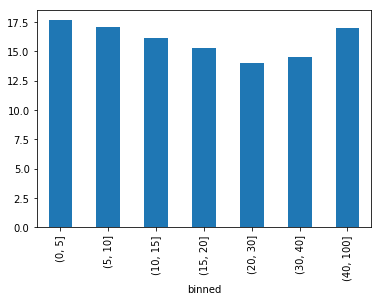

In [10]:
table_cre['not_paid_off'].plot(kind='bar');

#### Debt to income ratio (DTI)

In [11]:
chi_square('dti')

chi_statistic: 3992.043
p-value: 0.00
degree of freedom: 3495
Dependent (reject H0)


- DTI at the individual records level does not show dependence to loan paid off rates. 

target       0      1  not_paid_off
binned                             
(0, 5]     920   6573     12.278126
(5, 10]   2006  13261     13.139451
(10, 15]  3020  17641     14.616911
(15, 20]  3374  17463     16.192350
(20, 30]  4107  18553     18.124448
(30, 40]   509   1946     20.733198


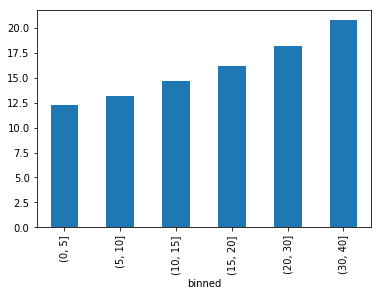

In [12]:
# visual the result with binned categories
bins = [0, 5, 10, 15, 20, 30, 40]
dti_table = lend_ml.copy()
dti_table['binned'] = pd.cut(dti_table['dti'], bins=bins)
table_dti = pd.crosstab(dti_table['binned'], dti_table['target']).sort_index()
table_dti['not_paid_off'] = table_dti[0]/(table_dti[0]+table_dti[1])*100
print(table_dti)
table_dti['not_paid_off'].plot(kind='bar');

The binned category shows that DTI is positively related to loan default.

DTI at the category of 5 bins level has dependence to the loan paid off rates. It shows that lower DTI has lower default rates. A new feature column will be added into the dataset during machine learning process.

#### Number of credit lines

In [13]:
chi_square('total_acc')

chi_statistic: 117.419
p-value: 0.01
degree of freedom: 82
Dependent (reject H0)


- Number of credit lines has dependence to the loan paid off rates

target        0      1  not_paid_off
binned                              
(0, 5]      307   1355     18.471721
(5, 10]    1427   7168     16.602676
(10, 15]   2323  12094     16.112922
(15, 20]   2559  13926     15.523203
(20, 30]   4230  23508     15.249838
(30, 40]   2097  11755     15.138608
(40, 60]    957   5389     15.080366
(60, 100]    66    388     14.537445


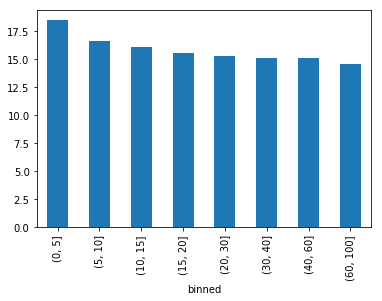

In [14]:
# visual the result with binned categories
bins = [0, 5, 10, 15, 20, 30, 40, 60, 100]
ttl_acc_table = lend_ml.copy()
ttl_acc_table['binned'] = pd.cut(ttl_acc_table['total_acc'], bins=bins)
table_ttl_acc = pd.crosstab(ttl_acc_table['binned'], ttl_acc_table['target']).sort_index()
table_ttl_acc['not_paid_off'] = table_ttl_acc[0]/(table_ttl_acc[0]+table_ttl_acc[1])*100
print(table_ttl_acc)
table_ttl_acc['not_paid_off'].plot(kind='bar');

- Surprise to see that applicants who have more credit lines are less likely to be default. It may mean that either those applicants are very savvy as it comes to paid off debt or they default on other credit lines, but not the one with Lending Club.

#### Applicant's State

In [15]:
chi_square('addr_state')
table_state = pd.crosstab(lend_ml['addr_state'], lend_ml['target'], margins=True)
table_state['paid_off_rate'] = table_state[1]/(table_state[1] + table_state[0])*100
print(table_state.sort_values(by='paid_off_rate', ascending=False))

chi_statistic: 180.373
p-value: 0.00
degree of freedom: 47
Dependent (reject H0)
target          0      1    All  paid_off_rate
addr_state                                    
TN              0      1      1     100.000000
MS              0      2      2     100.000000
IA              0      1      1     100.000000
DC             21    337    358      94.134078
WY             17    186    203      91.625616
WV             42    346    388      89.175258
NH             47    358    405      88.395062
KS             95    637    732      87.021858
IL            463   3041   3504      86.786530
TX            901   5861   6762      86.675540
AK             34    218    252      86.507937
CO            237   1468   1705      86.099707
DE             33    197    230      85.652174
MT             35    207    242      85.537190
MA            372   2194   2566      85.502728
SD             26    153    179      85.474860
PA            461   2687   3148      85.355781
OR            160    916  

Applicant's State shows dependence to loan paid off rates.

Notice that TN and IA have 100% paid off rate, but they only have 1 records each, hence we don't have big enough sample to conclude that all applicants from both states will always repay their loans.

In the machine learning part, we will replace small state label (<200 records) as "SML" to avoid overfit for this feature.

### Conclusion
Loan purpose, home ownership, credit history, DTI, number of credit lines, and applicant's State show dependence to the loan paid off rates. We will adopt all features in machine learning 

### Limitation
The whole analysis assumes that there is no correlation among features. Each test is isolated to one features at a time versus target.

[Back to README](https://github.com/sittingman/lending_repayment)